<a href="https://colab.research.google.com/github/dr-kinder/MEE2024/blob/main/pmls-3.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 3.2

In this problem, you will learn to use a random number generator and create histograms.  This material is the subject of Chapter 6 in _A Student's Guide to Python._

In [1]:
# Standard setup
import numpy as np
import matplotlib.pyplot as plt

# Create a random number generator
from numpy.random import default_rng
rng = default_rng()

# Draw from the Uniform Distribution
rand = rng.random

Run the cell below several times.

In [10]:
rand()

0.12272900403336984

Every time you call `rand()`, Python generates a random number between 0 and 1.  We can use Python's logic functions to turn this into a binary function.  Run the cell below several times.

In [19]:
rand() < 0.5

True

Describe what the output, and how it might be used to simulate the flip of a coin.

-----

*This seems useful because you can make a binary decision and use it to control function behavior: decide what happens with the flip of a coin.  If you changed the `0.5` to some other number in the range `[0,1]`, you could simulate a biased coin.*

-----

The goal of this problem is to "generate 6000 six-bit random binary fractions" and plot the result as a histogram.  Thus, we need to flip a coin six times, then use the results of each flip to create a binary fraction.  Let $s_n$ be the outcome of the $n$-th flip.  Then, the number generated by a set of six flips is

$$x = \dfrac{s_0}{2} + \dfrac{s_1}{2^2} + \dfrac{s_2}{2^3} + \dfrac{s_3}{2^4} + \dfrac{s_4}{2^5} + \dfrac{s_5}{2^6}$$

(This uses Python indexing for the coin flips.)

Run the following cell several times.  Verify that it generates a six-bit random binary fraction, then explain how it works.  That is, parse each line an explain how the Python code is implementing the matematical formula above.

-----

In [26]:
s = rand(6) < 0.5
x = np.sum(s / 2**np.arange(1,7))

print("x= {}".format(x))

x= 0.921875


*`s` is a string of six random Boolean values. `2**np.arange(1,7)` contains the first 6 powers of 2.  Dividing `s` by this array promotes `s` to a float (0 or 1), and divides each element by a different power of 2.  By summing the resulting array, we get a 6-bit binary fraction of exactly the form shown in the equation above."*

------

Now, write a `for` loop that will create an array and fill it with `N=6,000` six-bit random binary fractions.  (You can copy and paste the first two lines of the code cell above into the body of the `for` loop, or develop your own algorithm.)

The average counts per bin is 1000.00 +/- 28.34.


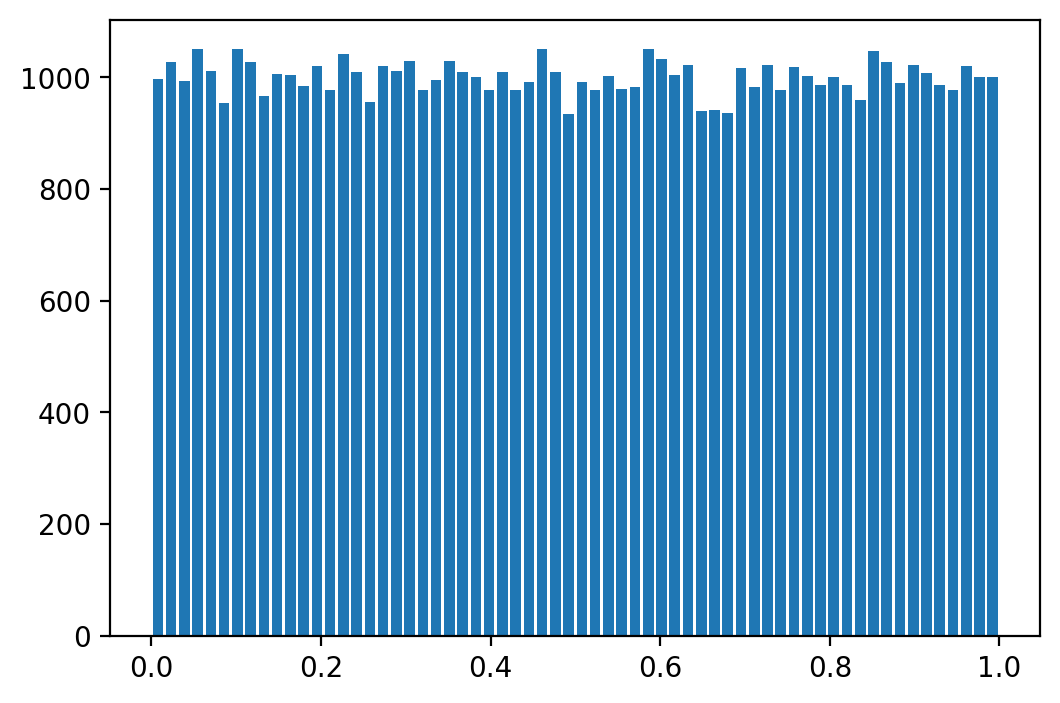

In [70]:
N = 64000
M = 6

X = np.zeros(N)
for n in range(N):
    s = rand(M) < 0.5
    X[n] = np.sum(s / 2**np.arange(1,M+1))

plt.figure(figsize=(6,4),dpi=200)
counts, bins, *more = plt.hist(X, bins=2**M, range=(0,1), rwidth=0.8)

message = "The average counts per bin is {:.2f} +/- {:.2f}."
print(message.format(counts.mean(), counts.std()))

Use `plt.hist` to create a histogram of your data set.

## Bonus

___Challenge 1:___  Use `plt.subplot` or `plt.subplots` to make a single row of three separate histograms.  (See Section 4.3.9 for details.)  Use 10 bins for the first, 100 for the second, and 1000 bins for the third.

___Challenge 2:___ Write the body of the function described below.  Include comments.  Test and debug it.

Plotting a histogram of `binary_fractions(6,6000)` should produce similar output to what you created above ...

In [71]:
def binary_fractions(m, N):
    """
    Generate and return an array of N m-bit binary fractions.

    Input
        m = number of bits
        N = number of binary fractions to generate

    Returns
        x = N-element array of m-bit binary fractions
    """

    X = np.zeros(N)
    for n in range(N):
        s = rand(M) < 0.5
        X[n] = np.sum(s / 2**np.arange(1,M+1))

    return X

The average counts per bin is 100.00 +/- 9.14.


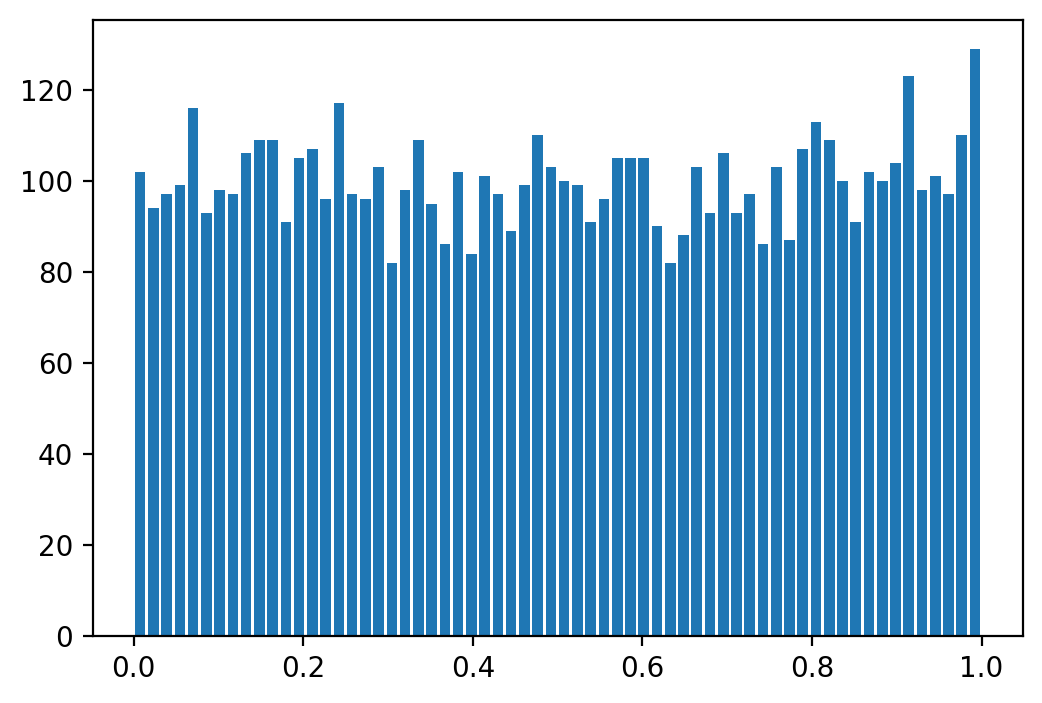

In [75]:
X = binary_fractions(6,6400)

plt.figure(figsize=(6,4),dpi=200)
counts, bins, *more = plt.hist(X, bins=2**M, range=(0,1), rwidth=0.8)

message = "The average counts per bin is {:.2f} +/- {:.2f}."
print(message.format(counts.mean(), counts.std()))